<a href="https://colab.research.google.com/github/marrvinn/marrvinn/blob/main/Schneidzeit/schneidzeit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = r'/content/drive/MyDrive/PJS/01_Input/Daten/Baseline_Daten/Rawr.csv'

In [ ]:
df = pd.read_csv(data_path, index_col=0)

In [ ]:
df

,x_Links,x_Rechts,y_Unten,y_Oben,X_sheetsize,Y_sheetsize,BSig,MarBot,MarLeft,MarRight,MarTop,Orient,JobID,ProjectID,DocName,ZeitDauer,Leistung,Menge,Schneidzeit
0,1244.409449,2454.803150,34.015748,1751.811024,2494.488189,1785.826772,B1,2.834646,2.834646,2.834646,2.834646,Rotate0,6510615901,65106159,6510615901_0,0.2717,9201.0,2500.0,0.2717
1,39.685039,1250.078740,34.015748,1751.811024,2494.488189,1785.826772,A1,2.834646,2.834646,2.834646,2.834646,Rotate0,6510615901,65106159,6510615901_1,0.2717,9201.0,2500.0,0.2717
2,25.511811,1250.078740,12.755905,1761.732284,2494.488189,1785.826772,B2,2.834646,2.834646,2.834646,2.834646,Rotate0,6510729103,65107291,6510729103_0,0.3094,12928.0,4000.0,0.3094
3,1244.409449,2468.976378,12.755905,1761.732284,2494.488189,1785.826772,B3,2.834646,2.834646,2.834646,2.834646,Rotate0,6510729103,65107291,6510729103_1,0.3094,12928.0,4000.0,0.3094
4,48.188976,649.133858,888.661417,1170.708661,2494.488189,1785.826772,P,2.834646,2.834646,2.834646,2.834646,Rotate0,6510729105,65107291,6510729105_0,0.6460,4644.0,3000.0,0.6460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,634.960630,1250.078740,39.685039,895.748032,2494.488189,1785.826772,N5,2.834646,2.834646,2.834646,2.834646,Rotate0,6513087310,65130873,6513087310_5,0.0812,3079.0,250.0,0.0812
506,1853.858268,2468.976378,890.078740,1746.141732,2494.488189,1785.826772,N6,2.834646,2.834646,2.834646,2.834646,Rotate0,6513087310,65130873,6513087310_6,0.0812,3079.0,250.0,0.0812
507,29.055118,1260.708661,34.015748,1751.811024,2494.488189,1785.826772,I2,2.834646,2.834646,2.834646,2.834646,Rotate0,6512513024,65125130,6512513024_0,0.1000,1000.0,100.0,0.1000
508,1255.039370,2465.433071,34.015748,895.748032,2494.488189,1785.826772,J2,2.834646,2.834646,2.834646,2.834646,Rotate0,6512513024,65125130,6512513024_1,0.1000,1000.0,100.0,0.1000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 0 to 509
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   x_Links      510 non-null    float64
 1   x_Rechts     510 non-null    float64
 2   y_Unten      510 non-null    float64
 3   y_Oben       510 non-null    float64
 4   X_sheetsize  510 non-null    float64
 5   Y_sheetsize  510 non-null    float64
 6   BSig         510 non-null    object 
 7   MarBot       510 non-null    float64
 8   MarLeft      510 non-null    float64
 9   MarRight     510 non-null    float64
 10  MarTop       510 non-null    float64
 11  Orient       510 non-null    object 
 12  JobID        510 non-null    int64  
 13  ProjectID    510 non-null    int64  
 14  DocName      510 non-null    object 
 15  ZeitDauer    488 non-null    float64
 16  Leistung     488 non-null    float64
 17  Menge        488 non-null    float64
 18  Schneidzeit  488 non-null    float64
dtypes: float

In [ ]:
def maßeBerechnen(df):
  x_Maße = df[['x_Links', 'x_Rechts']]
  y_Maße = df[['y_Unten', 'y_Oben']]
  id = df['DocName']
  Project_id = df['ProjectID']
  Job_id = df['JobID']
  Menge = df['Menge']
  Breite = abs(x_Maße['x_Links'] - x_Maße['x_Rechts'])
  Höhe = abs(y_Maße['y_Unten'] - y_Maße['y_Oben'])
  
  df2 = pd.DataFrame(list(zip(Breite, Höhe, id, Menge, Project_id, Job_id)),
               columns =['Breite', 'Höhe', 'DocName', 'Menge', 'ProjectID', 'JobID'])
  return df2

In [ ]:
Maße_df = maßeBerechnen(df)
print(Maße_df)

          Breite         Höhe       DocName   Menge  ProjectID       JobID
0    1210.393701  1717.795276  6510615901_0  2500.0   65106159  6510615901
1    1210.393701  1717.795276  6510615901_1  2500.0   65106159  6510615901
2    1224.566929  1748.976378  6510729103_0  4000.0   65107291  6510729103
3    1224.566929  1748.976378  6510729103_1  4000.0   65107291  6510729103
4     600.944882   282.047244  6510729105_0  3000.0   65107291  6510729105
..           ...          ...           ...     ...        ...         ...
505   615.118110   856.062992  6513087310_5   250.0   65130873  6513087310
506   615.118110   856.062992  6513087310_6   250.0   65130873  6513087310
507  1231.653543  1717.795276  6512513024_0   100.0   65125130  6512513024
508  1210.393701   861.732284  6512513024_1   100.0   65125130  6512513024
509  1210.393701   861.732284  6512513024_2   100.0   65125130  6512513024

[510 rows x 6 columns]


In [ ]:
df = df.merge(Maße_df)

# Schneidzeitbestimmung

X:
jetzt:
*   Mehrere Boxen (mit versch. Länge und Breite)
*   Menge
*   Anzahl Flyer auf Druckbogen

später:
*   Sheetsize
*   Dicke (Grammatur)

y:
*   Schneidzeit



In [ ]:
df.columns

Index(['x_Links', 'x_Rechts', 'y_Unten', 'y_Oben', 'X_sheetsize',
       'Y_sheetsize', 'BSig', 'MarBot', 'MarLeft', 'MarRight', 'MarTop',
       'Orient', 'JobID', 'ProjectID', 'DocName', 'ZeitDauer', 'Leistung',
       'Menge', 'Schneidzeit', 'Breite', 'Höhe'],
      dtype='object')

In [ ]:
reduced_df = df[['JobID', 'Menge', 'Schneidzeit']]
df = reduced_df

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 509
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   JobID        488 non-null    int64  
 1   Menge        488 non-null    float64
 2   Schneidzeit  488 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.2 KB


In [ ]:
df.head(1)

,JobID,Menge,Schneidzeit
0,6510615901,2500.0,0.2717


In [ ]:
df['Anzahl_Flyer'] = df.groupby('JobID')['JobID'].transform('count')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df = df[['JobID', 'Menge', 'Anzahl_Flyer', 'Schneidzeit']]
df.head(2)

,JobID,Menge,Anzahl_Flyer,Schneidzeit
0,6510615901,2500.0,2,0.2717
1,6510615901,2500.0,2,0.2717


In [ ]:
array = df.values
X = array[:,1:3]
y = array[:,3]

# Spotcheck
BEST RESULT: >svmr1.0: -0.030 (+/-0.054)
[Spotcheck](https://machinelearningmastery.com/spot-check-machine-learning-algorithms-in-python/)

In [ ]:
# regression spot check script
import warnings
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# load the dataset, returns X and y elements
def load_dataset(df):
  X = df[['Höhe', 'Breite', 'Menge']].to_numpy()
  y = df['Schneidzeit'].to_numpy()
  return X, y

In [ ]:
# create a dict of standard models to evaluate {name:object}
def get_models(models=dict()):
	# linear models
	models['lr'] = LinearRegression()
	alpha = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for a in alpha:
		models['lasso-'+str(a)] = Lasso(alpha=a)
	for a in alpha:
		models['ridge-'+str(a)] = Ridge(alpha=a)
	for a1 in alpha:
		for a2 in alpha:
			name = 'en-' + str(a1) + '-' + str(a2)
	    # models[name] = ElasticNet(a1, a2)
	models['huber'] = HuberRegressor()
	models['lars'] = Lars()
	models['llars'] = LassoLars()
	models['pa'] = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3)
	models['ranscac'] = RANSACRegressor()
	models['sgd'] = SGDRegressor(max_iter=1000, tol=1e-3)
	models['theil'] = TheilSenRegressor()
	# non-linear models
	n_neighbors = range(1, 21)
	for k in n_neighbors:
		models['knn-'+str(k)] = KNeighborsRegressor(n_neighbors=k)
	models['cart'] = DecisionTreeRegressor()
	models['extra'] = ExtraTreeRegressor()
	models['svml'] = SVR(kernel='linear')
	models['svmp'] = SVR(kernel='poly')
	c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for c in c_values:
		models['svmr'+str(c)] = SVR(C=c)
	# ensemble models
	n_trees = 100
	models['ada'] = AdaBoostRegressor(n_estimators=n_trees)
	models['bag'] = BaggingRegressor(n_estimators=n_trees)
	models['rf'] = RandomForestRegressor(n_estimators=n_trees)
	models['et'] = ExtraTreesRegressor(n_estimators=n_trees)
	models['gbm'] = GradientBoostingRegressor(n_estimators=n_trees)
	print('Defined %d models' % len(models))
	return models
 
# create a feature preparation pipeline for a model
def make_pipeline(model):
	steps = list()
	# standardization
	steps.append(('standardize', StandardScaler()))
	# normalization
	steps.append(('normalize', MinMaxScaler()))
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline
 
# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
	# create the pipeline
	pipeline = make_pipeline(model)
	# evaluate model
	scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
	return scores
 
# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
	scores = None
	try:
		with warnings.catch_warnings():
			warnings.filterwarnings("ignore")
			scores = evaluate_model(X, y, model, folds, metric)
	except:
		scores = None
	return scores
 
# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
	results = dict()
	for name, model in models.items():
		# evaluate the model
		scores = robust_evaluate_model(X, y, model, folds, metric)
		# show process
		if scores is not None:
			# store a result
			results[name] = scores
			mean_score, std_score = mean(scores), std(scores)
			print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
		else:
			print('>%s: error' % name)
	return results
 
# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
	# check for no results
	if len(results) == 0:
		print('no results')
		return
	# determine how many results to summarize
	n = min(top_n, len(results))
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,mean(v)) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	# retrieve the top n for summarization
	names = [x[0] for x in mean_scores[:n]]
	scores = [results[x[0]] for x in mean_scores[:n]]
	# print the top n
	print()
	for i in range(n):
		name = names[i]
		mean_score, std_score = mean(results[name]), std(results[name])
		print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	# boxplot for the top n
	pyplot.boxplot(scores, labels=names)
	_, labels = pyplot.xticks()
	pyplot.setp(labels, rotation=90)
	pyplot.savefig('spotcheck.png')

Defined 69 models
>lr: -0.037 (+/-0.076)
>lasso-0.0: -0.037 (+/-0.076)
>lasso-0.1: -0.036 (+/-0.057)
>lasso-0.2: -0.036 (+/-0.057)
>lasso-0.3: -0.036 (+/-0.057)
>lasso-0.4: -0.036 (+/-0.057)
>lasso-0.5: -0.036 (+/-0.057)
>lasso-0.6: -0.036 (+/-0.057)
>lasso-0.7: -0.036 (+/-0.057)
>lasso-0.8: -0.036 (+/-0.057)
>lasso-0.9: -0.036 (+/-0.057)
>lasso-1.0: -0.036 (+/-0.057)
>ridge-0.0: -0.037 (+/-0.076)
>ridge-0.1: -0.037 (+/-0.075)
>ridge-0.2: -0.037 (+/-0.074)
>ridge-0.3: -0.037 (+/-0.074)
>ridge-0.4: -0.036 (+/-0.073)
>ridge-0.5: -0.036 (+/-0.073)
>ridge-0.6: -0.036 (+/-0.072)
>ridge-0.7: -0.036 (+/-0.072)
>ridge-0.8: -0.036 (+/-0.071)
>ridge-0.9: -0.036 (+/-0.071)
>ridge-1.0: -0.036 (+/-0.070)
>huber: -0.033 (+/-0.067)
>lars: -0.037 (+/-0.076)
>llars: -0.036 (+/-0.057)
>pa: -0.286 (+/-0.260)
>ranscac: -0.040 (+/-0.062)
>sgd: -0.034 (+/-0.052)
>theil: -0.032 (+/-0.056)
>knn-1: -0.054 (+/-0.076)
>knn-2: -0.053 (+/-0.077)
>knn-3: -0.053 (+/-0.077)
>knn-4: -0.054 (+/-0.077)
>knn-5: -0.054 (+

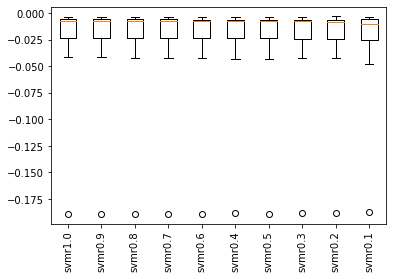

In [ ]:
# load dataset
# X, y = load_dataset(df)
# get model list
models = get_models()
# evaluate models
results = evaluate_models(X, y, models, metric='neg_mean_squared_error')
# summarize results
summarize_results(results)

# RandomForestRegressor¶

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=15)
regr.fit(X, y)
print(regr.predict([[2500.0, 2]]))

[0.31235548]


# SVMR


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [ ]:
# https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
# regr = make_pipeline(StandardScaler(), SVR(C=1.0))
# regr.fit(X, y)
# steps = [('standardscaler', StandardScaler()),('svr', SVR(C=1.0))]
# Pipeline(steps=steps)

In [ ]:
estimators = [('standardscaler', StandardScaler()), ('svr', SVR(C=1.0))]
pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [ ]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
score = 'neg_mean_squared_error'

In [ ]:
param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__epsilon': [0.1, 0.2, 0.3, 0.4, 0.5]}

In [ ]:
search = GridSearchCV(pipe, param_grid, cv=3, scoring=score, n_jobs = -1, verbose = 2)

In [ ]:
search.fit(X, y)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__epsilon': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'svr__kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)

Best parameter (CV score=-0.030):


In [ ]:
print(search.best_params_)

{'svr__epsilon': 0.1, 'svr__kernel': 'rbf'}


In [ ]:
pipe.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [ ]:
pipe.score(X, y)

0.3089844355612601

In [ ]:
test = [2500, 2]

In [ ]:
predicted = pipe.predict([[3000, 11]])

In [ ]:
predicted

array([0.54603988])